In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import analysis_utils as au
import importlib
import scipy.signal as scisig

In [159]:
importlib.reload(au)

<module 'analysis_utils' from 'c:\\Users\\thoma\\Documents\\SIMPLE\\Nanoparticle\\Scripts\\Simulations\\SIMPLE_lorentzforce\\Experiment analysis\\analysis_utils.py'>

In [160]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250219_3e-7mbar/'
filestart = '20250125_abcd_nomagnet_'
file_num = [0, 1, 2, 3, 4]
file_end = '.hdf5'

In [161]:
datas = []
PSDs = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs.append(PSD_dv[1])
freq = PSD_dv[0]

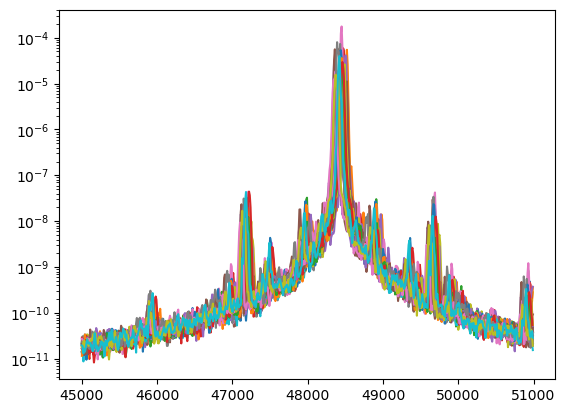

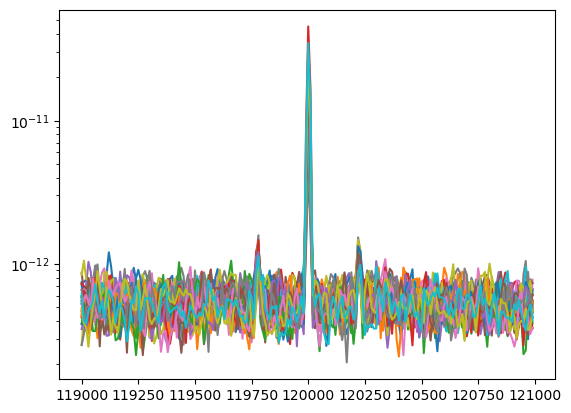

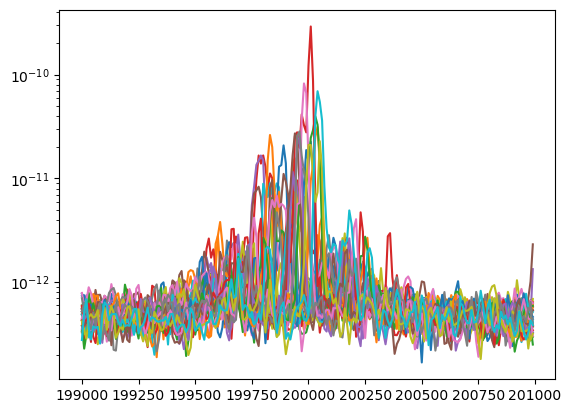

In [165]:
lb = 4500
ub = 5100
for PSD in PSDs:
    plt.plot(freq[lb:ub], PSD[lb:ub])
plt.yscale('log')
plt.figure()
lb = 11900
ub = 12100
for PSD in PSDs:
    plt.plot(freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

plt.figure()
lb = 19900
ub = 20100
for PSD in PSDs:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [127]:
max_val = []
random_point = []
x_max = []
for PSD in PSDs[:30]:
    max_val.append(PSD[12000])
    random_point.append(PSD[11900])
    x_max.append(np.max(PSD[19950:20075]))

In [126]:
len(PSDs)

60

In [128]:
np.std(max_val)

9.279564464751015e-12

In [129]:
np.std(random_point)

1.4906543528963641e-13

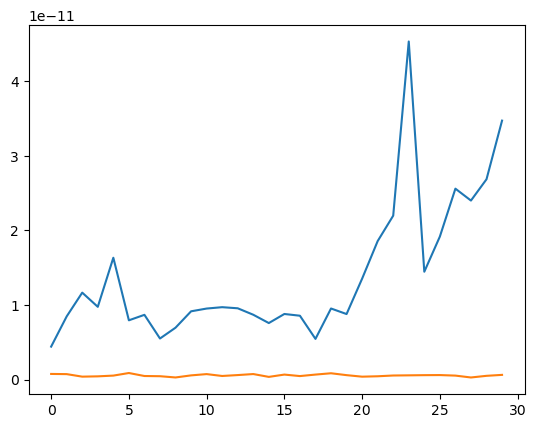

In [166]:
plt.plot(max_val)
plt.plot(random_point)
#plt.plot(x_max)

In [86]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250219_3e-7mbar/'
filestart = '20250125_abcd_wmagnet_'
file_num = [0, 1, 2, 3, 4]
file_end = '.hdf5'

In [87]:
datas2 = []
PSDs2 = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs.append(PSD_dv[1])
freq2 = PSD_dv[0]

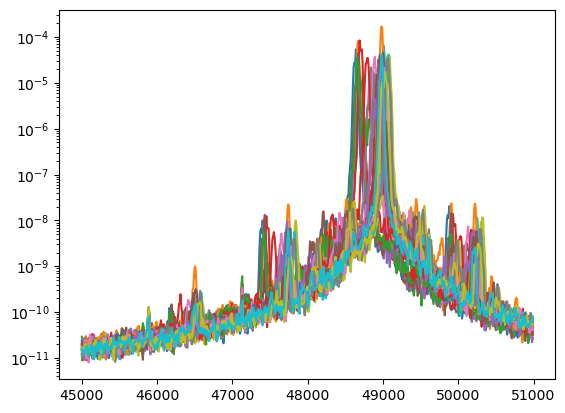

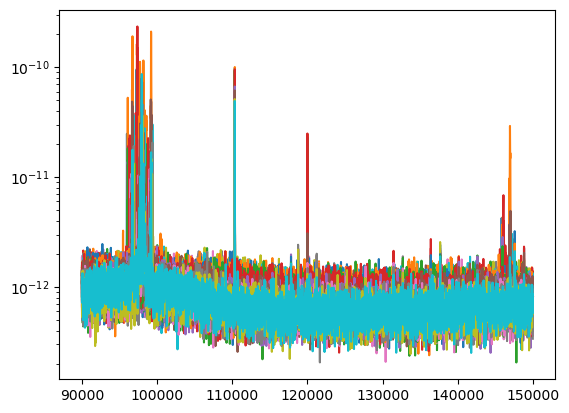

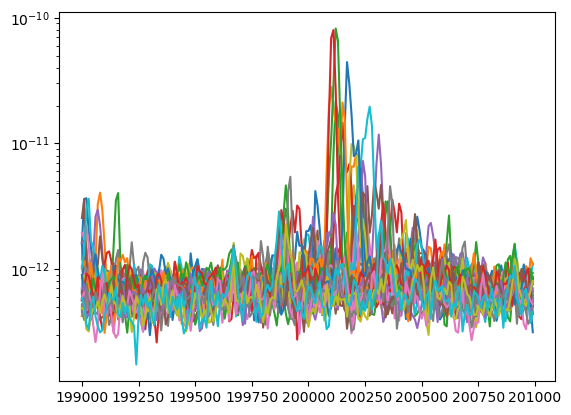

In [167]:
lb = 4500
ub = 5100
for PSD in PSDs2:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')
plt.figure()
lb = 9000
ub = 15000
for PSD in PSDs2:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')
plt.figure()
lb = 19900
ub = 20100
for PSD in PSDs2:
    plt.plot(freq2[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [119]:
max_val2 = []
random_point2 = []
x_max2 = []
for PSD in PSDs2:
    max_val2.append(PSD[12000])
    random_point2.append(PSD[11900])
    x_max2.append(np.max(PSD[19950:20075]))

In [101]:
np.std(max_val2)

7.0602509635229995e-12

In [102]:
np.std(random_point2)

2.162483995814643e-13

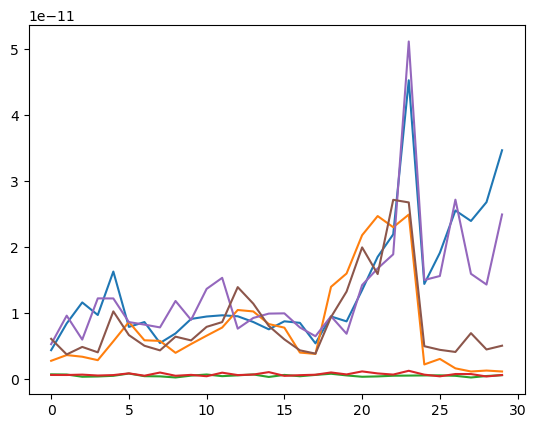

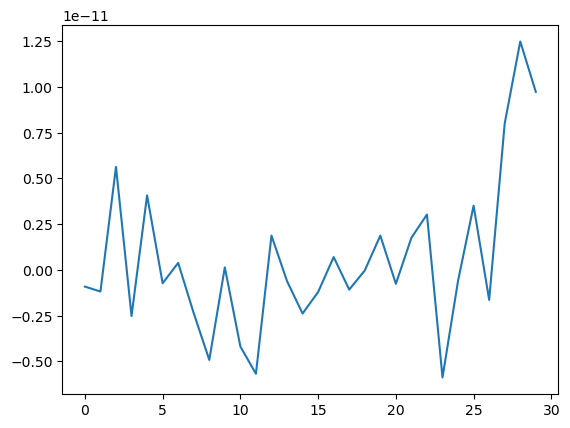

In [139]:
plt.plot(max_val)
plt.plot(max_val2)

plt.plot(random_point)
plt.plot(random_point2)

plt.plot(np.sqrt(x_max)/10**6*3)
plt.plot(np.sqrt(x_max2)/10**6*3)
plt.figure()
plt.plot(max_val - np.sqrt(x_max)/10**6*3)

In [114]:
PSD1_avr = np.mean(PSDs, axis=0)
PSD2_avr = np.mean(PSDs2, axis=0)

Text(0.5, 0, 'Frequency (kHz)')

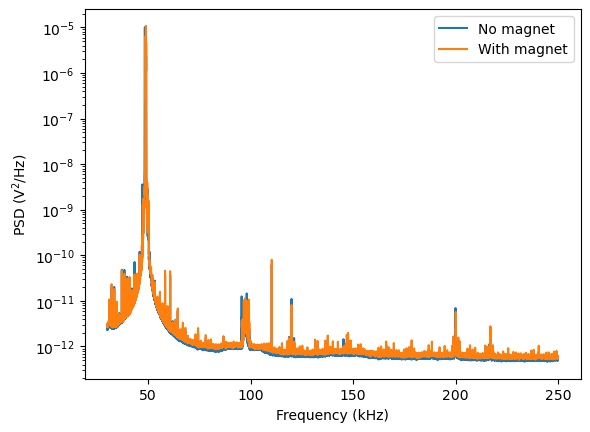

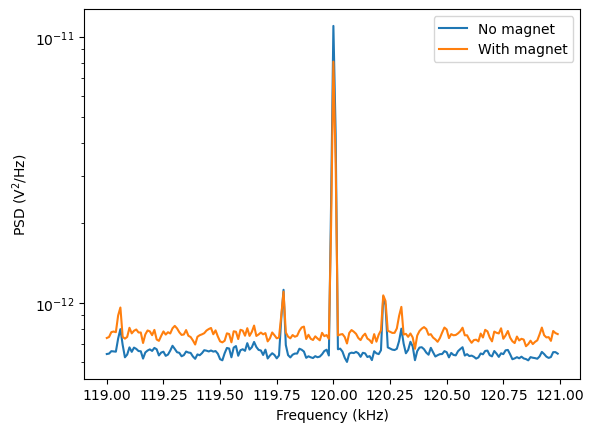

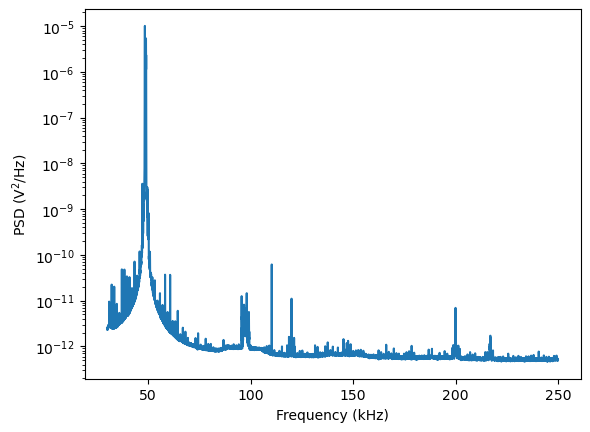

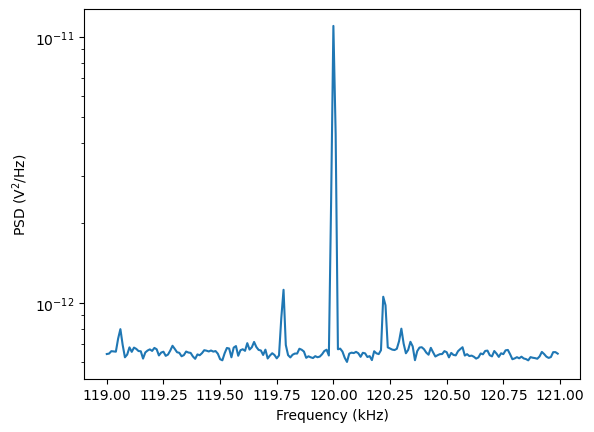

In [149]:
lb = 3000
ub = 25000
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()
plt.figure()
lb = 11900
ub = 12100
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.legend()
plt.figure()
lb = 3000
ub = 25000
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
#plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.figure()
lb = 11900
ub = 12100
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
#plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')

In [150]:
filename

'D:/Lab Data/lorentz_force/sphere_20250219/20250219_3e-7mbar/20250125_abcd_wmagnet_4.hdf5'

In [153]:
f = h5py.File(filename, 'r')
np.array(f['data']['channel_d'])

array([2161, 2237, 2332, ..., 2275, 2370, 2465], dtype=int16)

<Figure size 640x480 with 0 Axes>

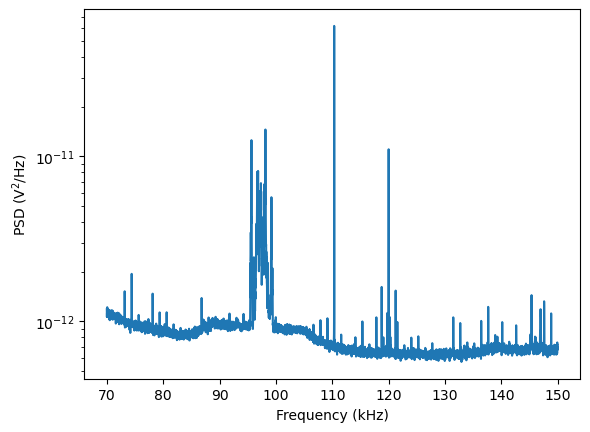

<Figure size 640x480 with 0 Axes>

In [170]:
plt.figure()
lb = 7000
ub = 15000
plt.plot(freq[lb:ub]/1000, PSD1_avr[lb:ub], label = 'No magnet')
#plt.plot(freq[lb:ub]/1000, PSD2_avr[lb:ub], label = 'With magnet')
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.figure()